## What is Bootstrapping?

In [1]:
import numpy as np
X = np.array([[1., 0.], [2., 1.], [0., 0.], [3., 5.], [7., 9.], [22., 19.], [94., 97.]])

In [2]:
!pwd

/Users/smoot/Desktop/ga/DSI_SM_01/curriculum/week-06/2.3-lesson


In [7]:
X

array([[  1.,   0.],
       [  2.,   1.],
       [  0.,   0.],
       [  3.,   5.],
       [  7.,   9.],
       [ 22.,  19.],
       [ 94.,  97.]])

In [8]:
from sklearn.utils import resample
resample(X)

array([[  3.,   5.],
       [ 22.,  19.],
       [  2.,   1.],
       [  2.,   1.],
       [ 94.,  97.],
       [  0.,   0.],
       [ 94.,  97.]])

In [10]:
from sklearn.utils import shuffle
shuffle(X)

array([[  0.,   0.],
       [  7.,   9.],
       [  2.,   1.],
       [  1.,   0.],
       [ 22.,  19.],
       [ 94.,  97.],
       [  3.,   5.]])

In [11]:
shuffle(X, n_samples=3)

array([[  2.,   1.],
       [ 94.,  97.],
       [  3.,   5.]])

## What is Bootstrap Aggregating (aka Bagging)?

In [14]:
import pandas as pd
df = pd.read_csv('./assets/datasets/car.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features = [c for c in df.columns if c != 'acceptability']
for c in df.columns:
    df[c] = le.fit_transform(df[c])

X = df[features]
y = df['acceptability']

In [16]:
df.acceptability.values

array([2, 2, 2, ..., 2, 1, 3])

In [17]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
bagging = BaggingClassifier(knn, max_samples=0.5, max_features=0.5)

print "KNN Score:\t", cross_val_score(knn, X, y, cv=5, n_jobs=-1).mean()
print "Bagging Score:\t", cross_val_score(bagging, X, y, cv=5, n_jobs=-1).mean()

KNN Score:	0.643070305149
Bagging Score:	0.747684500605


### Example from "An Introduction to Statistical Learning", James, Witten, Hastie, and Tibshirani

see http://www-bcf.usc.edu/~gareth/ISL/

In [18]:
boston_df = pd.read_csv('Boston.csv')
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [21]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

pd.set_option('display.notebook_repr_html', False)

%matplotlib inline
plt.style.use('seaborn-white')

In [22]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [1]:
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)


NameError: name 'boston_df' is not defined

In [24]:
# Pruning not supported. Choosing max depth 3)
regr2 = DecisionTreeRegressor(max_depth=3)
regr2.fit(X_train, y_train)
pred = regr2.predict(X_test)

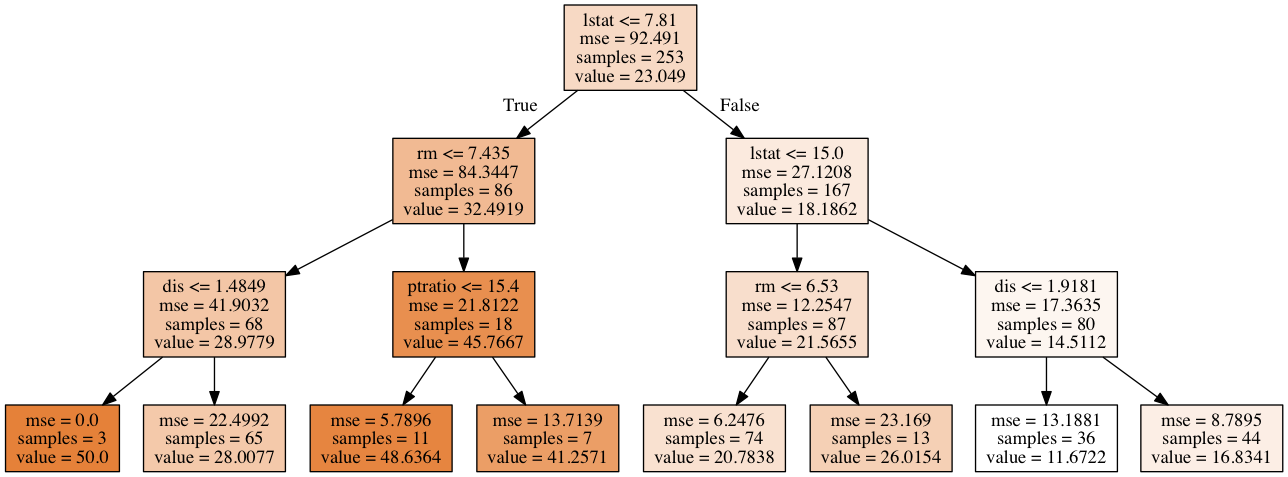

In [25]:
graph = print_tree(regr2, features=X.columns)
Image(graph.create_png())

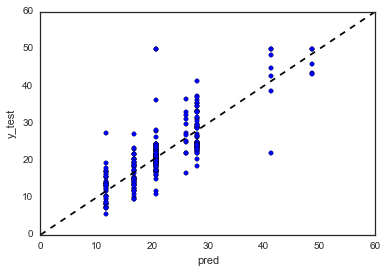

In [23]:
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [26]:
mean_squared_error(y_test, pred)

26.023230850097445

In [27]:
X.shape

(506, 13)

## Bagging and Random Forests

In [28]:
# Bagging: using all features
regr1 = RandomForestRegressor(max_features=13, random_state=1)
regr1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

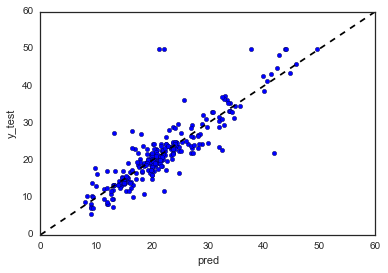

In [29]:
pred = regr1.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [30]:
mean_squared_error(y_test, pred)

18.301366007905138

In [31]:
# Random forests: using 6 features
regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [32]:
pred = regr2.predict(X_test)
mean_squared_error(y_test, pred)

16.469374703557314

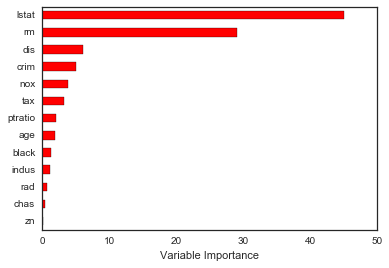

In [33]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## Bagging and Gridsearch CodeAlong

In [34]:
datapath = 'sf_crime_mini_cats.csv'
sf = pd.read_csv(datapath)
print sf.crime.value_counts()

stolen_property                250
weapon_laws                    250
burglary                       250
suspicious_occ                 250
larceny_theft                  250
drug_narcotic                  250
sex_offenses_forcible          250
vandalism                      250
kidnapping                     250
missing_person                 250
forgery_counterfeiting         250
robbery                        250
arson                          250
vehicle_theft                  250
driving_under_the_influence    250
disorderly_conduct             250
warrants                       250
drunkenness                    250
fraud                          250
loitering                      250
prostitution                   250
assault                        250
trespass                       250
Name: crime, dtype: int64


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
multi_lr = LogisticRegression()

X = sf[[x for x in sf.columns if x not in['crime','crime_category']]]
X = (X - X.mean()) / X.std()
X_col_names = X.columns
X = X.values

Y = sf['crime_category']

scores = cross_val_score(multi_lr, X, Y, cv=5)
print scores
print np.mean(scores)

[ 0.10695652  0.10521739  0.10869565  0.12434783  0.11913043]
0.112869565217


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [37]:
from sklearn.grid_search import GridSearchCV

params = {
    'n_estimators':[50,100,250,500],
    'max_samples':[0.25, 0.5, 0.75, 1.0],
    'max_features':[0.25, 0.5, 0.75, 1.0]
}



In [38]:
dtc = DecisionTreeClassifier(max_depth=None)

bag = BaggingClassifier(dtc)

gs = GridSearchCV(bag, params, cv=5, verbose=1, n_jobs=-1)

gs.fit(X, Y)

print gs.best_params_
print gs.best_score_

best_bag = gs.best_estimator_

#bag_scores = cross_val_score(bag, X, Y, cv=5)

#print bag_scores
#print np.mean(bag_scores)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/Users/smoot/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/smoot/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/Users/smoot/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = o

{'max_features': 0.75, 'max_samples': 0.25, 'n_estimators': 500}
0.164347826087
